In [86]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import networkx as nx
np.set_printoptions(precision=2)

In [256]:
Y = np.array([[0, 1, 1, 0, 0, 0],
             [1, 0, 1, 0, 0, 1],
             [1, 1, 0, 0, 0, 0], 
             [0, 0, 0, 0, 1, 1], 
             [0, 0, 0, 1, 0, 1],
             [0, 1, 0, 1, 1, 0]])
M = np.load('blogsDen.npy')
Ms = M[650:850, 650:850] 


V = Ms
n = V.shape[1]

B = np.diag(np.ones(n)*5)
ONE = np.ones((n,n))
a = 1
b = 1.9
tol = 1e-10

print n


200


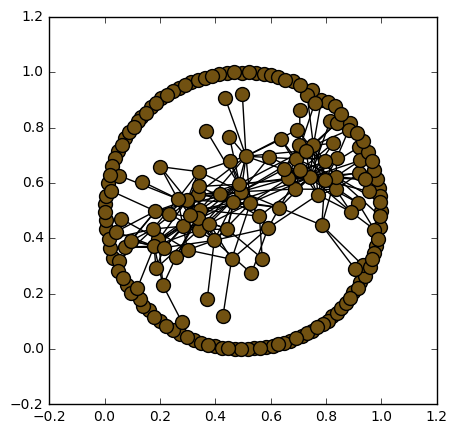

In [297]:
G = nx.from_numpy_matrix(np.matrix(V))
pos = nx.spring_layout(G)

plt.figure(figsize = (5,5))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color = '#715111')
nx.draw_networkx_edges(G, pos, G.edges())
plt.show()

1477.91248598 1479.60644701 1480.91130658 1481.21941911 1481.64020183 1482.08830705 1482.11813212 1482.18856807 1482.29892647 1482.30307924 1482.33040169 1482.4500932 1482.61391362 1482.65914235 1482.65954213 1482.66014272 1482.71486887 1482.71835775 1482.71848355 1482.71858777 1482.71867887 1482.71875644 1482.71882451 1482.71888915 1482.71895588 1482.71902623 1482.71910396 1482.72563886 1482.75362198 1482.75380497

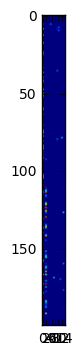

 15


In [301]:
W = np.random.rand(n,n)
H = np.random.rand(n,n)
B = np.diag(np.ones(n)*5)

#iterations
iterN = 300
for i in range(iterN):
    if (i+1)%10==0:
        #print i,
        print np.linalg.norm(beta),
        
    preH1 = (W.T).dot(np.divide(V, W.dot(H)+1e-19))
    preH2 = np.divide(H, (W.T).dot(ONE)+B.dot(H)+1e-19)
    H = np.multiply(preH2, preH1)
    
    preW1 = (np.divide(V, W.dot(H)+1e-19)).dot(H.T)
    preW2 = np.divide(W, ONE.dot(H.T)+W.dot(B)+1e-19)
    W = np.multiply(preW2, preW1)
    
    beta = np.ones(n)
    for j in range(n):
        beta[j] = (n+a-1)/((np.sum(np.multiply(W,W), axis = 0)[j]+(np.sum(np.multiply(H,H), axis = 1)[j]))/2+b)
    B = np.diag(beta)
    
#####     column and rows remove
W[abs(W)<tol] = 0.0
H[abs(H)<tol] = 0.0
sW = np.sum(W, axis=0)
sH = np.sum(H, axis=1)
sW[abs(sW)<1e-3] = 0.0
sH[abs(sH)<1e-3] = 0.0

removeW = []
removeH = []
for i in range(n):
    if sW[i]==0:
        removeW.append(i)
    if sH[i]==0:
        removeH.append(i)
W = np.delete(W, removeW, axis = 1)
H = np.delete(H, removeH, axis = 0)
#####     

plt.imshow(W)
plt.figure(figsize=(10,10))
plt.show()
print np.count_nonzero(sW)

In [306]:
clusters =  [np.count_nonzero(W[:,k]) for k in range(np.count_nonzero(sW))]
print np.sum(clusters)
print np.argmax(clusters)
#print np.count_nonzero(np.sum(H, axis=1))
print W.shape[0]
print clusters
print np.nonzero(W[:,0])[0]

158
0
200
[53, 8, 43, 1, 4, 8, 4, 1, 8, 4, 2, 1, 1, 12, 8]
[  1   2   6   9  13  18  24  25  26  34  37  40  42  43  48  50  51  52
  53  60  61  64  71  74  75  76  78  81  84  85  86  88  90  92  93 103
 104 105 111 113 114 116 122 126 131 135 137 140 158 167 171 173 179]


53


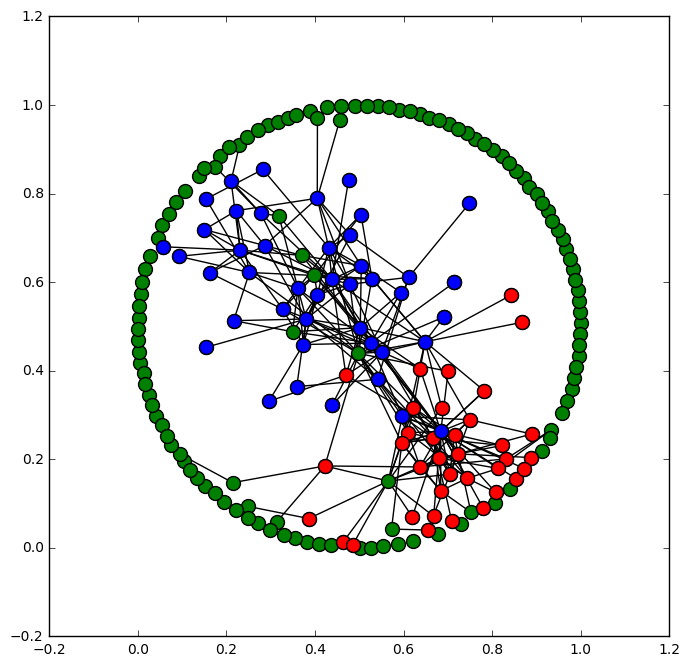

In [320]:
G = nx.from_numpy_matrix(np.matrix(V))
pos = nx.spring_layout(G)

list1 = np.nonzero(W[:,0])[0]
list2 = np.nonzero(W[:,2])[0]
print len(list1)
plt.figure(figsize = (8,8))

nx.draw_networkx_nodes(G, pos, node_size=100, node_color = "g")
nx.draw_networkx_nodes(G, pos, list(list1), node_size=100, node_color = "r")
nx.draw_networkx_nodes(G, pos, list(list2), node_size=100, node_color = "b")


nx.draw_networkx_edges(G, pos, G.edges())
plt.show()


In [291]:
print hex(2000000)
print type(hex(15000000))
G = nx.from_numpy_matrix(np.matrix(V))
pos = nx.spring_layout(G)

plt.figure(figsize = (5,5))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color = "r")
nx.draw_networkx_edges(G, pos, G.edges())
#plt.show()

def viz(mW):
    clustNum = mW.shape[1]
    

0x1e8480
<type 'str'>
